# Checkpoint 1

Reminder: 

- You are being evaluated for compeletion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>.
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

Include comments throughout your code! Every cleanup and preprocessing task should be documented.

Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [32]:
df=pd.read_csv("../data/states_edu.csv")
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [33]:
df.dropna(subset=['FEDERAL_REVENUE','STATE_REVENUE','AVG_MATH_4_SCORE'], inplace=True)

In [34]:
df

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN
5,1992_COLORADO,COLORADO,1992,NaN,3185173.0,163253.0,1307986.0,1713934.0,3264826.0,1642466.0,...,50648.0,45025.0,34533.0,NaN,NaN,612635.0,221.0,272.0,217.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1219,2015_VIRGINIA,VIRGINIA,2015,1279867.0,15857524.0,1012205.0,6240349.0,8604970.0,16113212.0,8755896.0,...,96851.0,95221.0,90391.0,772414.0,386781.0,1283590.0,247.0,288.0,229.0,267.0
1220,2015_WASHINGTON,WASHINGTON,2015,1072359.0,13709442.0,1036422.0,8293812.0,4379208.0,13630138.0,6508964.0,...,82404.0,79483.0,89258.0,656797.0,336808.0,1087030.0,245.0,287.0,226.0,267.0
1221,2015_WEST_VIRGINIA,WEST_VIRGINIA,2015,279565.0,3478401.0,362959.0,1979466.0,1135976.0,3466981.0,1819903.0,...,19814.0,20426.0,18432.0,162070.0,80142.0,277452.0,235.0,271.0,216.0,260.0
1222,2015_WISCONSIN,WISCONSIN,2015,861813.0,11637376.0,814385.0,5869265.0,4953726.0,11553677.0,5723474.0,...,60999.0,61084.0,66253.0,489919.0,263896.0,867800.0,243.0,289.0,223.0,270.0


<h2>Exploratory Data Analysis (EDA) </h2>

Chosen Outcome Variable for Test: *STATE_REVENUE*

How many years of data are logged in our dataset? 

In [35]:
df["YEAR"].unique().size

9

Let's compare Michigan to Ohio. Which state has the higher average outcome score across all years?

In [36]:
mean_state_revenue=df.groupby("STATE")["AVG_MATH_4_SCORE"].mean()
if (mean_state_revenue["MICHIGAN"]>mean_state_revenue["OHIO"]):
    print("MICHIGAN")
elif (mean_state_revenue["MICHIGAN"]<mean_state_revenue["OHIO"]):
    print("OHIO")
else:
    print("same")

OHIO


Find the average for your outcome score across all states in 2019

In [37]:
df.set_index("YEAR").loc[1992]["AVG_MATH_4_SCORE"].mean()

218.38095238095238

Find the maximum outcome score for every state. 

Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

In [38]:
df.groupby("STATE")["AVG_MATH_4_SCORE"].max()

STATE
ALABAMA                 233.0
ALASKA                  237.0
ARIZONA                 240.0
ARKANSAS                240.0
CALIFORNIA              234.0
COLORADO                247.0
CONNECTICUT             245.0
DELAWARE                243.0
DISTRICT_OF_COLUMBIA    231.0
FLORIDA                 243.0
GEORGIA                 240.0
HAWAII                  243.0
IDAHO                   242.0
ILLINOIS                239.0
INDIANA                 249.0
IOWA                    246.0
KANSAS                  248.0
KENTUCKY                242.0
LOUISIANA               234.0
MAINE                   246.0
MARYLAND                247.0
MASSACHUSETTS           253.0
MICHIGAN                238.0
MINNESOTA               253.0
MISSISSIPPI             234.0
MISSOURI                241.0
MONTANA                 244.0
NEBRASKA                244.0
NEVADA                  237.0
NEW_HAMPSHIRE           253.0
NEW_JERSEY              249.0
NEW_MEXICO              233.0
NEW_YORK                243.0
NORT

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

<Axes: title={'center': 'Distribution of 4th Grade Math Scores'}, ylabel='Frequency'>

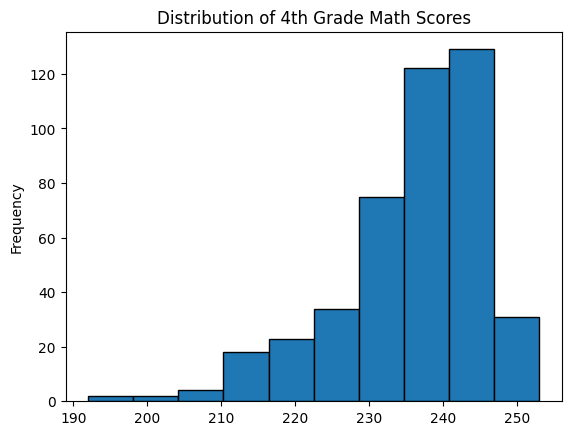

In [39]:
df.AVG_MATH_4_SCORE.plot.hist(title="Distribution of 4th Grade Math Scores", edgecolor="black")

In [40]:
df2=df
non_numerical=[]
for col in df2:
    if pd.api.types.is_numeric_dtype(df[col])==False:
        non_numerical.append(col)
df2=df2.drop(columns=non_numerical)
df2=df2.dropna()

In [41]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df2=pd.DataFrame(scaler.fit_transform(df2),columns=df2.columns)
df2

,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,-1.496883,-0.188136,-0.439307,-0.324701,-0.338895,-0.525956,-0.431047,-0.411958,-0.463490,-0.120357,...,-0.164917,-0.150139,-0.301614,-0.159530,-0.238873,-0.202815,-2.416324,-2.237598,-1.852726,-1.587716
1,-1.496883,-0.738100,-0.725797,-0.553624,-0.694237,-0.735098,-0.705617,-0.701707,-0.734062,-0.759535,...,-0.739070,-0.733436,-0.745540,-0.738927,-0.739494,-0.741635,-0.899982,-0.233457,-1.137038,-1.138363
2,-1.496883,-0.051975,-0.337949,-0.196328,-0.347863,-0.331665,-0.363209,-0.412833,-0.344571,-0.329528,...,0.064754,0.050769,0.055215,0.061214,0.067434,0.050541,-1.506519,-1.176582,-1.566451,-1.288147
3,-1.496883,-0.445030,-0.587851,-0.464125,-0.433381,-0.716899,-0.584099,-0.559881,-0.610905,-0.560214,...,-0.447725,-0.422524,-0.476834,-0.438373,-0.460055,-0.452427,-1.506519,-1.766035,-0.850762,-0.838793
4,-1.496883,4.897769,3.711241,3.557455,4.718423,2.470145,3.622095,3.361526,3.701912,4.333919,...,5.138920,5.144894,4.399164,5.057606,4.742928,4.923572,-1.809787,-1.648145,-1.995864,-1.887285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350,1.513845,0.322399,0.370856,0.005375,0.201204,0.584105,0.373931,0.425970,0.491062,0.231000,...,0.315830,0.277306,0.342381,0.300714,0.307695,0.295485,1.222899,0.827559,1.296304,0.509267
351,1.513845,0.130467,0.207624,0.023358,0.540021,-0.091460,0.189099,0.108941,0.339357,0.091457,...,0.140123,0.088118,0.327301,0.126530,0.156686,0.118165,0.919630,0.709669,0.866890,0.509267
352,1.513845,-0.602817,-0.569831,-0.476740,-0.501833,-0.609949,-0.567411,-0.552658,-0.560050,-0.450951,...,-0.621109,-0.621809,-0.615359,-0.618805,-0.618911,-0.612165,-0.596713,-1.176582,-0.564487,-0.539224
353,1.513845,-0.064275,0.050168,-0.141522,0.139976,0.000387,0.034534,-0.001887,0.119426,0.033379,...,-0.120209,-0.133057,0.021116,-0.124881,-0.063641,-0.079605,0.616361,0.945450,0.437477,0.958621


Feature engineering justification: **<BRIEFLY DESCRIBE WHY YOU MADE THE CHANGES THAT YOU DID\>**
Since using one-hot encoding wouldn't be of much use for this dataset, I removed all the numerical analysis. And to help keep all the data in a reasonable range that could help with the analysis, I conducted a standard scaling to all the numerical data.

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

/home/cogito/mdst-tutorial/2023-Tutorials-main/env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/cogito/mdst-tutorial/2023-Tutorials-main/env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/cogito/mdst-tutorial/2023-Tutorials-main/env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/cogito/mdst-tutorial/2023-Tutorials-main/env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: 

/home/cogito/mdst-tutorial/2023-Tutorials-main/env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/cogito/mdst-tutorial/2023-Tutorials-main/env/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/cogito/mdst-tutorial/2023-Tutorials-main/env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/cogito/mdst-tutorial/2023-Tutorials-main/env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: Futur

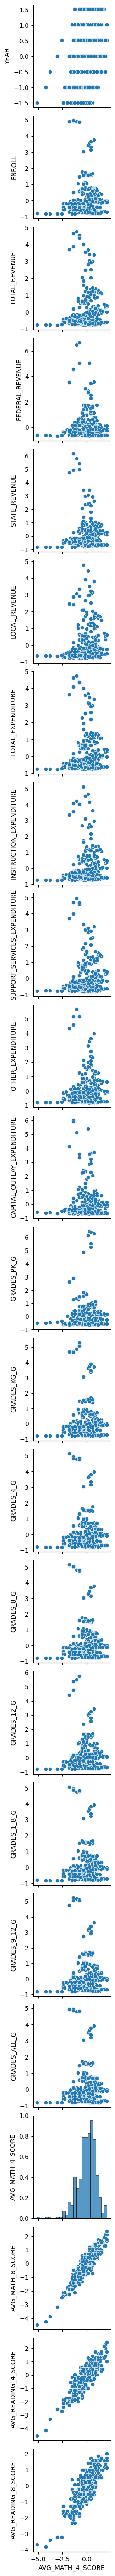

In [42]:
import seaborn as sns

sns.pairplot(data=df2,x_vars="AVG_MATH_4_SCORE", y_vars=df2.columns)

**VIZ1: Pairplot of 4th grade Math scores against all numerical data**

**Visualization 2**

/home/cogito/mdst-tutorial/2023-Tutorials-main/env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/cogito/mdst-tutorial/2023-Tutorials-main/env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/cogito/mdst-tutorial/2023-Tutorials-main/env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/cogito/mdst-tutorial/2023-Tutorials-main/env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: 

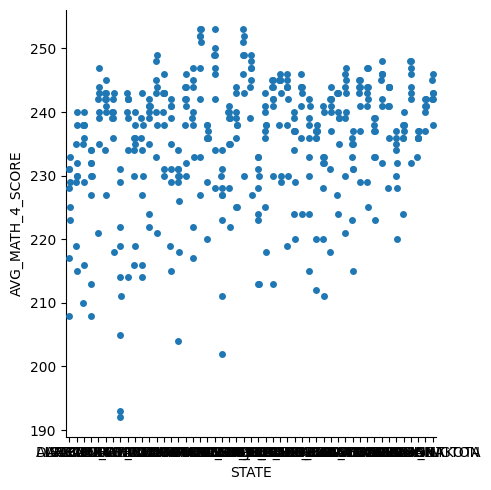

In [43]:
sns.catplot(data=df, y="AVG_MATH_4_SCORE", x="STATE")

**Catagorical scatter plot of average 4th grade math scores against all states**

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [44]:
from sklearn.model_selection import KFold

In [59]:
x = df2.drop("AVG_MATH_4_SCORE", axis=1)
y = df2["AVG_MATH_4_SCORE"]

In [49]:

kf = KFold(shuffle=True, random_state=156413, n_splits=4)
kf.split(x)
simple_scores=[]

In [50]:
for train_index, test_index in kf.split(x):
    X_train, X_test, y_train, y_test = (x.iloc[train_index, :], 
                                        x.iloc[test_index, :], 
                                        y[train_index], 
                                        y[test_index])

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [51]:
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [52]:
lr = LinearRegression()
lr.fit(X_train, y_train)   


LinearRegression()

In [53]:
y_pred = lr.predict(X_test)
score = r2_score(y_test.values, y_pred)
simple_scores.append(score)

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [54]:
lr.score(X_test, y_test)

0.8769306154091172

In [55]:
np.mean(lr.predict(X_test)-y_test)

-0.05142774197183873

In [56]:
np.mean(np.abs(lr.predict(X_test)-y_test))

0.24747665261919566

We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

Text(0.5, 1.0, 'Model Behavior On Training Set')

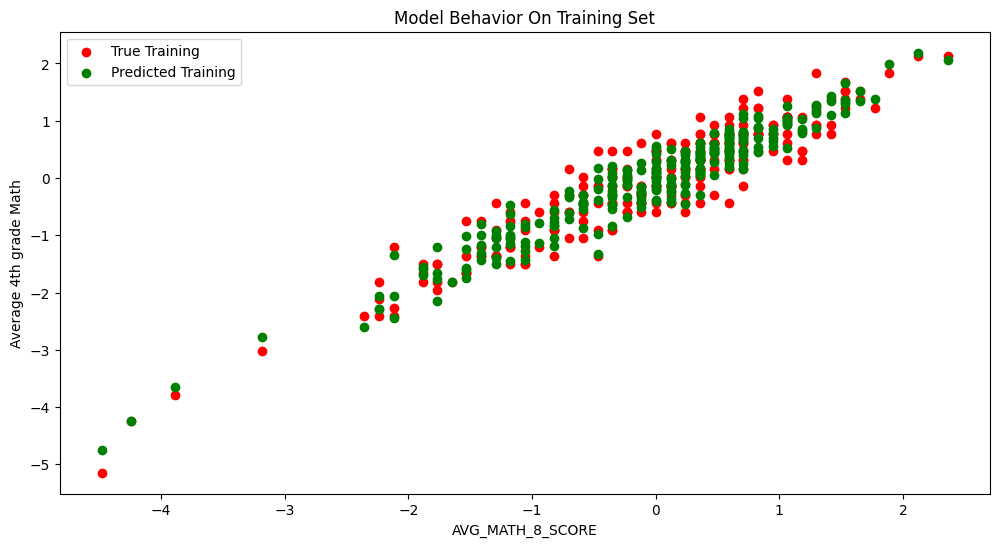

In [61]:
col_name = 'AVG_MATH_8_SCORE'

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], lr.predict(X_train), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('Average 4th grade Math')
plt.title("Model Behavior On Training Set")

Text(0.5, 1.0, 'Model Behavior on Testing Set')

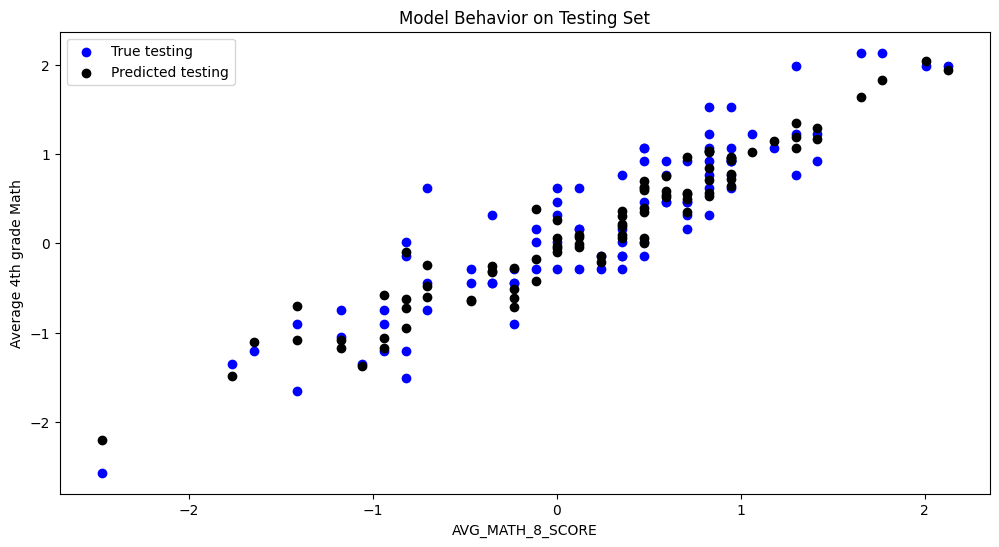

In [62]:
col_name = 'AVG_MATH_8_SCORE'

f = plt.figure(figsize=(12,6))
plt.scatter(X_test[col_name], y_test, color = "blue")
plt.scatter(X_test[col_name], lr.predict(X_test), color = "black")

plt.legend(['True testing','Predicted testing'])
plt.xlabel(col_name)
plt.ylabel('Average 4th grade Math')
plt.title("Model Behavior on Testing Set")

<h2> Summary </h2>

From the model we can find that the average 4th grade math score is closely related to the 8th grade math score, hinting that math capibilities differ little as people to improve the model, I would implement polynomial features to the numerical features and include back the categorical features by implementing one-hot encoding, and during the polynomial regression, I would inplement LassoCV to decrease the magnitude of overfitting. This I believe would provide a better result than the current one.